<a href="https://colab.research.google.com/github/Shamitha22/real-time-sentiment-analysis-using-lstm/blob/main/TwitterSentimentAnalysisDL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 # Import necessary libraries
from tensorflow.keras.models import Sequential  # Import Sequential from TensorFlow's Keras API
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout  # Correct imports for layers
from tensorflow.keras.preprocessing.text import Tokenizer  # Correct import for Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nltk.tokenize import RegexpTokenizer

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, classification_report

# Ensure TensorFlow compatibility
import tensorflow as tf
print(f"Using TensorFlow version: {tf.__version__}")



Using TensorFlow version: 2.17.1


In [ ]:
tweetsData = pd.read_csv('training.1600000.processed.noemoticon.csv', encoding='latin-1') #skiping these two rows as they have some bad data
print(tweetsData.shape)
tweetsData.head(n=10)

(1599999, 6)


,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
5,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug
6,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...
7,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it
8,0,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,@twittera que me muera ?
9,0,1467812416,Mon Apr 06 22:20:16 PDT 2009,NO_QUERY,erinx3leannexo,spring break in plain city... it's snowing


In [ ]:
DATASET_COLUMNS = ["Sentiment", "ids", "date", "flag", "user", "SentimentText"]
tweetsData.columns = DATASET_COLUMNS
tweetsData.head(n=10)

,Sentiment,ids,date,flag,user,SentimentText
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
5,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug
6,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...
7,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it
8,0,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,@twittera que me muera ?
9,0,1467812416,Mon Apr 06 22:20:16 PDT 2009,NO_QUERY,erinx3leannexo,spring break in plain city... it's snowing


In [ ]:
tweetsData.drop(['ids','date','flag','user'],axis = 1 ,inplace = True)
tweetsData.head(n=10)

,Sentiment,SentimentText
0,0,is upset that he can't update his Facebook by ...
1,0,@Kenichan I dived many times for the ball. Man...
2,0,my whole body feels itchy and like its on fire
3,0,"@nationwideclass no, it's not behaving at all...."
4,0,@Kwesidei not the whole crew
5,0,Need a hug
6,0,@LOLTrish hey long time no see! Yes.. Rains a...
7,0,@Tatiana_K nope they didn't have it
8,0,@twittera que me muera ?
9,0,spring break in plain city... it's snowing


<Axes: xlabel='Sentiment'>

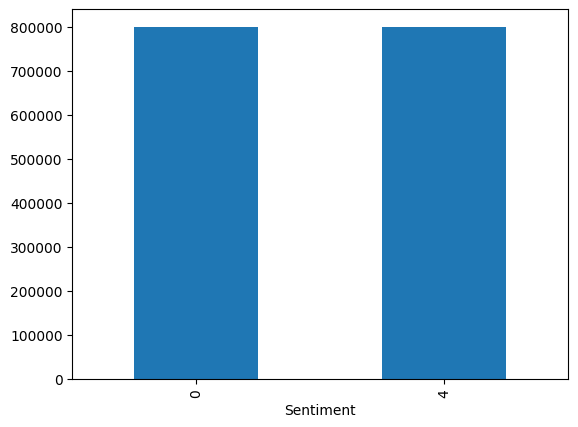

In [ ]:
#Data Exploration
tweetsData['Sentiment'].value_counts().sort_index().plot.bar()

<Axes: ylabel='Frequency'>

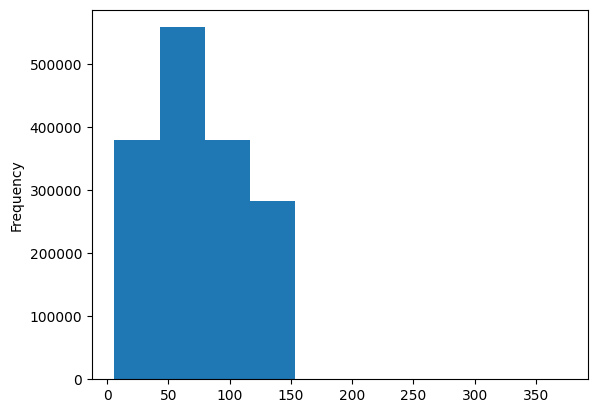

In [ ]:
tweetsData['SentimentText'].str.len().plot.hist()

In [ ]:
positif_data = tweetsData[tweetsData.Sentiment==4].iloc[:15000,:]
print(positif_data.shape)
negative_data = tweetsData[tweetsData.Sentiment==0].iloc[:15000,:]
print(negative_data.shape)

(15000, 2)
(15000, 2)


In [ ]:
tweetsData = pd.concat([positif_data,negative_data],axis = 0)
print(tweetsData.shape)
tweetsData.head(n=10)

(30000, 2)


,Sentiment,SentimentText
799999,4,I LOVE @Health4UandPets u guys r the best!!
800000,4,im meeting up with one of my besties tonight! ...
800001,4,"@DaRealSunisaKim Thanks for the Twitter add, S..."
800002,4,Being sick can be really cheap when it hurts t...
800003,4,@LovesBrooklyn2 he has that effect on everyone
800004,4,@ProductOfFear You can tell him that I just bu...
800005,4,@r_keith_hill Thans for your response. Ihad al...
800006,4,"@KeepinUpWKris I am so jealous, hope you had a..."
800007,4,"@tommcfly ah, congrats mr fletcher for finally..."
800008,4,@e4VoIP I RESPONDED Stupid cat is helping me ...


In [ ]:
#Data Cleaning
#Removing Twitter Handles (@user)
tweetsData['Clean_TweetText'] = tweetsData['SentimentText'].str.replace("@", "")
tweetsData.head(n=10)

,Sentiment,SentimentText,Clean_TweetText
799999,4,I LOVE @Health4UandPets u guys r the best!!,I LOVE Health4UandPets u guys r the best!!
800000,4,im meeting up with one of my besties tonight! ...,im meeting up with one of my besties tonight! ...
800001,4,"@DaRealSunisaKim Thanks for the Twitter add, S...","DaRealSunisaKim Thanks for the Twitter add, Su..."
800002,4,Being sick can be really cheap when it hurts t...,Being sick can be really cheap when it hurts t...
800003,4,@LovesBrooklyn2 he has that effect on everyone,LovesBrooklyn2 he has that effect on everyone
800004,4,@ProductOfFear You can tell him that I just bu...,ProductOfFear You can tell him that I just bur...
800005,4,@r_keith_hill Thans for your response. Ihad al...,r_keith_hill Thans for your response. Ihad alr...
800006,4,"@KeepinUpWKris I am so jealous, hope you had a...","KeepinUpWKris I am so jealous, hope you had a ..."
800007,4,"@tommcfly ah, congrats mr fletcher for finally...","tommcfly ah, congrats mr fletcher for finally ..."
800008,4,@e4VoIP I RESPONDED Stupid cat is helping me ...,e4VoIP I RESPONDED Stupid cat is helping me t...


In [ ]:
#Removing links
tweetsData['Clean_TweetText'] = tweetsData['Clean_TweetText'].str.replace(r"http\S+", "")
tweetsData.head(n=10)

,Sentiment,SentimentText,Clean_TweetText
799999,4,I LOVE @Health4UandPets u guys r the best!!,I LOVE Health4UandPets u guys r the best!!
800000,4,im meeting up with one of my besties tonight! ...,im meeting up with one of my besties tonight! ...
800001,4,"@DaRealSunisaKim Thanks for the Twitter add, S...","DaRealSunisaKim Thanks for the Twitter add, Su..."
800002,4,Being sick can be really cheap when it hurts t...,Being sick can be really cheap when it hurts t...
800003,4,@LovesBrooklyn2 he has that effect on everyone,LovesBrooklyn2 he has that effect on everyone
800004,4,@ProductOfFear You can tell him that I just bu...,ProductOfFear You can tell him that I just bur...
800005,4,@r_keith_hill Thans for your response. Ihad al...,r_keith_hill Thans for your response. Ihad alr...
800006,4,"@KeepinUpWKris I am so jealous, hope you had a...","KeepinUpWKris I am so jealous, hope you had a ..."
800007,4,"@tommcfly ah, congrats mr fletcher for finally...","tommcfly ah, congrats mr fletcher for finally ..."
800008,4,@e4VoIP I RESPONDED Stupid cat is helping me ...,e4VoIP I RESPONDED Stupid cat is helping me t...


In [ ]:
#Removing Punctuations, Numbers, and Special Characters
tweetsData['Clean_TweetText'] = tweetsData['Clean_TweetText'].str.replace("[^a-zA-Z]", " ")
tweetsData.head(n=10)

,Sentiment,SentimentText,Clean_TweetText
799999,4,I LOVE @Health4UandPets u guys r the best!!,I LOVE Health4UandPets u guys r the best!!
800000,4,im meeting up with one of my besties tonight! ...,im meeting up with one of my besties tonight! ...
800001,4,"@DaRealSunisaKim Thanks for the Twitter add, S...","DaRealSunisaKim Thanks for the Twitter add, Su..."
800002,4,Being sick can be really cheap when it hurts t...,Being sick can be really cheap when it hurts t...
800003,4,@LovesBrooklyn2 he has that effect on everyone,LovesBrooklyn2 he has that effect on everyone
800004,4,@ProductOfFear You can tell him that I just bu...,ProductOfFear You can tell him that I just bur...
800005,4,@r_keith_hill Thans for your response. Ihad al...,r_keith_hill Thans for your response. Ihad alr...
800006,4,"@KeepinUpWKris I am so jealous, hope you had a...","KeepinUpWKris I am so jealous, hope you had a ..."
800007,4,"@tommcfly ah, congrats mr fletcher for finally...","tommcfly ah, congrats mr fletcher for finally ..."
800008,4,@e4VoIP I RESPONDED Stupid cat is helping me ...,e4VoIP I RESPONDED Stupid cat is helping me t...


In [ ]:
#Transforming text to lowercase
tweetsData['Clean_TweetText'].apply(lambda x: x.lower())
tweetsData['Clean_TweetText'] = tweetsData['Clean_TweetText'].apply(lambda x: re.sub('[^a-zA-z0-9\s]', '', x))
tweetsData.head(n=10)


,Sentiment,SentimentText,Clean_TweetText
799999,4,I LOVE @Health4UandPets u guys r the best!!,I LOVE Health4UandPets u guys r the best
800000,4,im meeting up with one of my besties tonight! ...,im meeting up with one of my besties tonight C...
800001,4,"@DaRealSunisaKim Thanks for the Twitter add, S...",DaRealSunisaKim Thanks for the Twitter add Sun...
800002,4,Being sick can be really cheap when it hurts t...,Being sick can be really cheap when it hurts t...
800003,4,@LovesBrooklyn2 he has that effect on everyone,LovesBrooklyn2 he has that effect on everyone
800004,4,@ProductOfFear You can tell him that I just bu...,ProductOfFear You can tell him that I just bur...
800005,4,@r_keith_hill Thans for your response. Ihad al...,r_keith_hill Thans for your response Ihad alre...
800006,4,"@KeepinUpWKris I am so jealous, hope you had a...",KeepinUpWKris I am so jealous hope you had a g...
800007,4,"@tommcfly ah, congrats mr fletcher for finally...",tommcfly ah congrats mr fletcher for finally j...
800008,4,@e4VoIP I RESPONDED Stupid cat is helping me ...,e4VoIP I RESPONDED Stupid cat is helping me t...


In [ ]:
#Remove stop words
import nltk
nltk.download('stopwords')
stopwords=nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    clean_text=' '.join([word for word in text.split() if word not in stopwords])
    return clean_text
tweetsData['Clean_TweetText'] = tweetsData['Clean_TweetText'].apply(lambda text : remove_stopwords(text.lower()))
tweetsData.head(n=10)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,Sentiment,SentimentText,Clean_TweetText
799999,4,I LOVE @Health4UandPets u guys r the best!!,love health4uandpets u guys r best
800000,4,im meeting up with one of my besties tonight! ...,im meeting one besties tonight cant wait girl ...
800001,4,"@DaRealSunisaKim Thanks for the Twitter add, S...",darealsunisakim thanks twitter add sunisa got ...
800002,4,Being sick can be really cheap when it hurts t...,sick really cheap hurts much eat real food plu...
800003,4,@LovesBrooklyn2 he has that effect on everyone,lovesbrooklyn2 effect everyone
800004,4,@ProductOfFear You can tell him that I just bu...,productoffear tell burst laughing really loud ...
800005,4,@r_keith_hill Thans for your response. Ihad al...,r_keith_hill thans response ihad already find ...
800006,4,"@KeepinUpWKris I am so jealous, hope you had a...",keepinupwkris jealous hope great time vegas li...
800007,4,"@tommcfly ah, congrats mr fletcher for finally...",tommcfly ah congrats mr fletcher finally joini...
800008,4,@e4VoIP I RESPONDED Stupid cat is helping me ...,e4voip responded stupid cat helping type forgi...


In [ ]:
#Text Tokenization and Normalization
tweetsData['Clean_TweetText'] = tweetsData['Clean_TweetText'].apply(lambda x: x.split())
tweetsData.head(n=10)

,Sentiment,SentimentText,Clean_TweetText
799999,4,I LOVE @Health4UandPets u guys r the best!!,"[love, health4uandpets, u, guys, r, best]"
800000,4,im meeting up with one of my besties tonight! ...,"[im, meeting, one, besties, tonight, cant, wai..."
800001,4,"@DaRealSunisaKim Thanks for the Twitter add, S...","[darealsunisakim, thanks, twitter, add, sunisa..."
800002,4,Being sick can be really cheap when it hurts t...,"[sick, really, cheap, hurts, much, eat, real, ..."
800003,4,@LovesBrooklyn2 he has that effect on everyone,"[lovesbrooklyn2, effect, everyone]"
800004,4,@ProductOfFear You can tell him that I just bu...,"[productoffear, tell, burst, laughing, really,..."
800005,4,@r_keith_hill Thans for your response. Ihad al...,"[r_keith_hill, thans, response, ihad, already,..."
800006,4,"@KeepinUpWKris I am so jealous, hope you had a...","[keepinupwkris, jealous, hope, great, time, ve..."
800007,4,"@tommcfly ah, congrats mr fletcher for finally...","[tommcfly, ah, congrats, mr, fletcher, finally..."
800008,4,@e4VoIP I RESPONDED Stupid cat is helping me ...,"[e4voip, responded, stupid, cat, helping, type..."


In [ ]:
from nltk.stem.porter import *
stemmer = PorterStemmer()
tweetsData['Clean_TweetText'] = tweetsData['Clean_TweetText'].apply(lambda x: [stemmer.stem(i) for i in x])
tweetsData.head(n=10)

,Sentiment,SentimentText,Clean_TweetText
799999,4,I LOVE @Health4UandPets u guys r the best!!,"[love, health4uandpet, u, guy, r, best]"
800000,4,im meeting up with one of my besties tonight! ...,"[im, meet, one, besti, tonight, cant, wait, gi..."
800001,4,"@DaRealSunisaKim Thanks for the Twitter add, S...","[darealsunisakim, thank, twitter, add, sunisa,..."
800002,4,Being sick can be really cheap when it hurts t...,"[sick, realli, cheap, hurt, much, eat, real, f..."
800003,4,@LovesBrooklyn2 he has that effect on everyone,"[lovesbrooklyn2, effect, everyon]"
800004,4,@ProductOfFear You can tell him that I just bu...,"[productoffear, tell, burst, laugh, realli, lo..."
800005,4,@r_keith_hill Thans for your response. Ihad al...,"[r_keith_hil, than, respons, ihad, alreadi, fi..."
800006,4,"@KeepinUpWKris I am so jealous, hope you had a...","[keepinupwkri, jealou, hope, great, time, vega..."
800007,4,"@tommcfly ah, congrats mr fletcher for finally...","[tommcfli, ah, congrat, mr, fletcher, final, j..."
800008,4,@e4VoIP I RESPONDED Stupid cat is helping me ...,"[e4voip, respond, stupid, cat, help, type, for..."


In [ ]:
#Stitching the tokens back together
tweetsData['Clean_TweetText'] = tweetsData['Clean_TweetText'].apply(lambda x: ' '.join([w for w in x]))
tweetsData.head(n=10)

,Sentiment,SentimentText,Clean_TweetText
799999,4,I LOVE @Health4UandPets u guys r the best!!,love health4uandpet u guy r best
800000,4,im meeting up with one of my besties tonight! ...,im meet one besti tonight cant wait girl talk
800001,4,"@DaRealSunisaKim Thanks for the Twitter add, S...",darealsunisakim thank twitter add sunisa got m...
800002,4,Being sick can be really cheap when it hurts t...,sick realli cheap hurt much eat real food plu ...
800003,4,@LovesBrooklyn2 he has that effect on everyone,lovesbrooklyn2 effect everyon
800004,4,@ProductOfFear You can tell him that I just bu...,productoffear tell burst laugh realli loud tha...
800005,4,@r_keith_hill Thans for your response. Ihad al...,r_keith_hil than respons ihad alreadi find answer
800006,4,"@KeepinUpWKris I am so jealous, hope you had a...",keepinupwkri jealou hope great time vega like ...
800007,4,"@tommcfly ah, congrats mr fletcher for finally...",tommcfli ah congrat mr fletcher final join twi...
800008,4,@e4VoIP I RESPONDED Stupid cat is helping me ...,e4voip respond stupid cat help type forgiv error


In [ ]:
#Removing small words
tweetsData['Clean_TweetText'] = tweetsData['Clean_TweetText'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
tweetsData.head(n=10)

,Sentiment,SentimentText,Clean_TweetText
799999,4,I LOVE @Health4UandPets u guys r the best!!,love health4uandpet best
800000,4,im meeting up with one of my besties tonight! ...,meet besti tonight cant wait girl talk
800001,4,"@DaRealSunisaKim Thanks for the Twitter add, S...",darealsunisakim thank twitter sunisa meet show...
800002,4,Being sick can be really cheap when it hurts t...,sick realli cheap hurt much real food friend m...
800003,4,@LovesBrooklyn2 he has that effect on everyone,lovesbrooklyn2 effect everyon
800004,4,@ProductOfFear You can tell him that I just bu...,productoffear tell burst laugh realli loud tha...
800005,4,@r_keith_hill Thans for your response. Ihad al...,r_keith_hil than respons ihad alreadi find answer
800006,4,"@KeepinUpWKris I am so jealous, hope you had a...",keepinupwkri jealou hope great time vega like ...
800007,4,"@tommcfly ah, congrats mr fletcher for finally...",tommcfli congrat fletcher final join twitter
800008,4,@e4VoIP I RESPONDED Stupid cat is helping me ...,e4voip respond stupid help type forgiv error


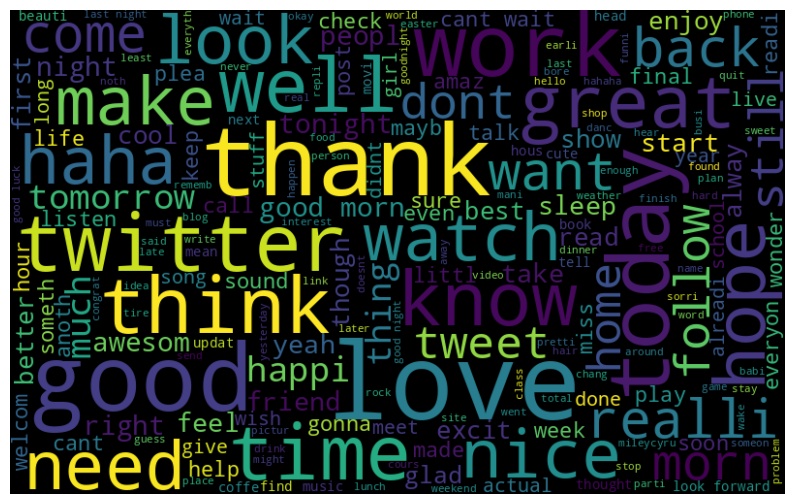

In [ ]:
positive_words =' '.join([text for text in tweetsData['Clean_TweetText'][tweetsData['Sentiment'] == 4]])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(positive_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

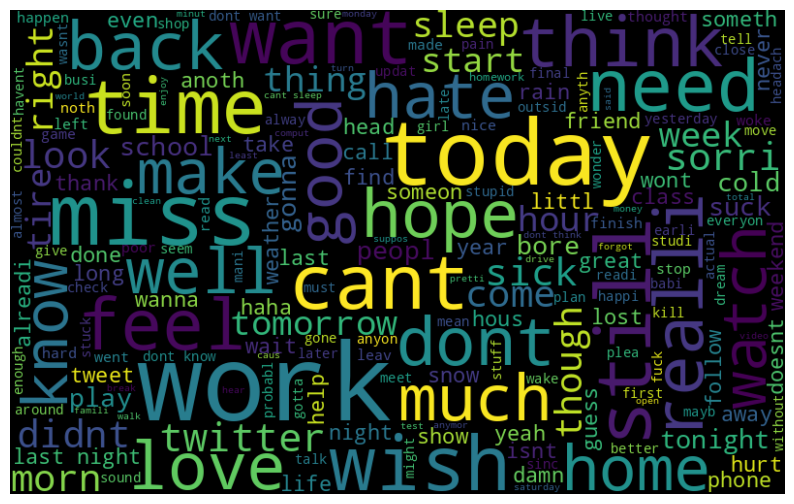

In [ ]:
negative_words =' '.join([text for text in tweetsData['Clean_TweetText'][tweetsData['Sentiment'] == 0]])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(negative_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [ ]:
tokenizer = Tokenizer(num_words=10000, split=" ")
tokenizer.fit_on_texts(tweetsData['Clean_TweetText'].values)

X = tokenizer.texts_to_sequences(tweetsData['Clean_TweetText'].values)
X = pad_sequences(X) # padding our text vector so they all have the same length
X[:5]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    5, 5654,   82],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
         131, 1298,   50,    8,   34,  104,   89],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0, 9099,
           9,   15, 9100,  131,   66,  800, 1778],
       [   0,    0,    0,    0,    0,    0,    0,    0,   61,   20, 1360,
         122,   29,  260,  230,   48,   24,  747],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0, 9101, 1299,   71]], dtype=int32)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dropout, Dense
import tensorflow as tf

# Example: Assume X is your input data
# Define model parameters
vocab_size = 10000  # Example vocab size
embedding_dim = 256  # Embedding dimension
input_length = X.shape[1]  # Assuming X is your input data

# Build the model
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=input_length))  # input_length inferred from X
model.add(Dropout(0.3))
model.add(LSTM(256, return_sequences=True, dropout=0.3, recurrent_dropout=0.2))
model.add(LSTM(256, dropout=0.3, recurrent_dropout=0.2))
model.add(Dense(2, activation='softmax'))  # Output layer for 2 classes
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Build the model explicitly with input shape
model.build(input_shape=(None, input_length))  # Input shape for the model
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ (None, 18, 256)             │       2,560,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 18, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 18, 256)             │         525,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 256)                 │         525,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             514 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,611,138 (13.78 MB)

 Trainable params: 3,611,138 (13.78 MB)

 Non-trainable params: 0 (0.00 B)

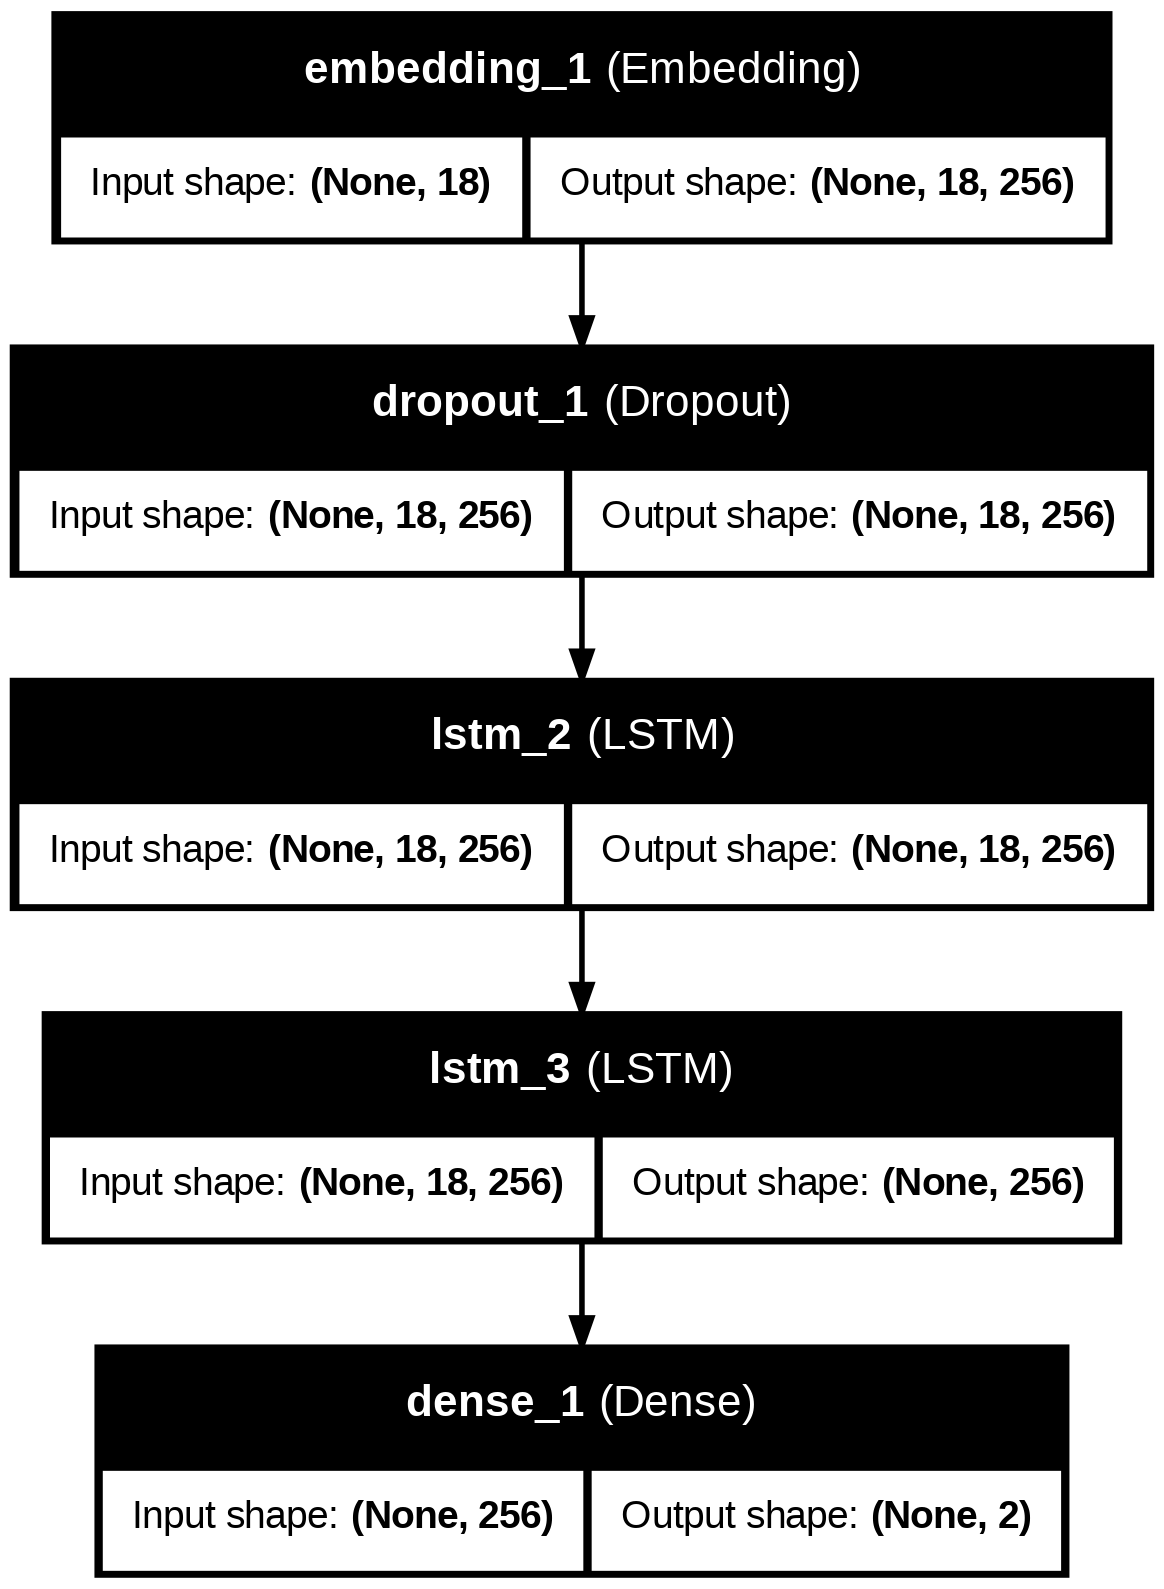

In [ ]:
#Visualize the Model
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


In [ ]:
y = pd.get_dummies(tweetsData['Sentiment']).values
[print(tweetsData['Sentiment'][i], y[i]) for i in range(0,5)]

0 [False  True]
0 [False  True]
0 [False  True]
0 [False  True]
0 [False  True]


[None, None, None, None, None]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

NameError: name 'train_test_split' is not defined

#**Training** **our** **model**

In [ ]:
model.fit(X_train, y_train, epochs=8, batch_size=32, verbose=2)

Epoch 1/8
750/750 - 160s - 213ms/step - accuracy: 0.7869 - loss: 0.4521
Epoch 2/8
750/750 - 196s - 262ms/step - accuracy: 0.8228 - loss: 0.3872
Epoch 3/8
750/750 - 206s - 274ms/step - accuracy: 0.8521 - loss: 0.3267
Epoch 4/8
750/750 - 196s - 261ms/step - accuracy: 0.8750 - loss: 0.2783
Epoch 5/8
750/750 - 156s - 207ms/step - accuracy: 0.8922 - loss: 0.2404
Epoch 6/8
750/750 - 199s - 265ms/step - accuracy: 0.9035 - loss: 0.2121
Epoch 7/8
750/750 - 205s - 273ms/step - accuracy: 0.9111 - loss: 0.1905
Epoch 8/8


In [ ]:
#model.save('Sentiment_Analysis.h5')

In [ ]:
#Testing our model
score, acc = model.evaluate(X_test, y_test, verbose = 2, batch_size=32)
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

188/188 - 10s - 52ms/step - accuracy: 0.6923 - loss: 1.1285
188/188 ━━━━━━━━━━━━━━━━━━━━ 12s 62ms/step


In [ ]:
predictions = model.predict(X_test)

[print(tweetsData['Clean_TweetText'][i], predictions[i], y_test[i]) for i in range(0, 5)]

188/188 ━━━━━━━━━━━━━━━━━━━━ 18s 96ms/step
upset cant updat facebook text might result school today also blah [0.02912519 0.97087485] [False  True]
kenichan dive mani time ball manag save rest bound [0.4345801  0.56541973] [False  True]
whole bodi feel itchi like fire [0.8091758  0.19082423] [False  True]
nationwideclass behav cant [0.00563766 0.99436235] [ True False]
kwesidei whole crew [0.70279735 0.2972025 ] [False  True]


[None, None, None, None, None]

In [ ]:
pos_count, neg_count = 0, 0
real_pos,  real_neg = 0, 0
for i, prediction in enumerate(predictions):
    if np.argmax(prediction)==1:
        pos_count += 1
    else:
        neg_count += 1

    if np.argmax(y_test[i])==1:
        real_pos += 1
    else:
        real_neg +=1

print('Positive predictions:', pos_count)
print('Negative predictions:', neg_count)
print('Real positive:', real_pos)
print('Real negative:', real_neg)


Positive predictions: 2893
Negative predictions: 3107
Real positive: 2987
Real negative: 3013


In [ ]:
#F1 Score, Recall and Precision
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))

              precision    recall  f1-score   support

    Negative       0.69      0.71      0.70      3013
    Positive       0.70      0.68      0.69      2987

   micro avg       0.69      0.69      0.69      6000
   macro avg       0.69      0.69      0.69      6000
weighted avg       0.69      0.69      0.69      6000
 samples avg       0.69      0.69      0.69      6000



In [ ]:
!pip install -q cross_validation

ERROR: Could not find a version that satisfies the requirement cross_validation (from versions: none)
ERROR: No matching distribution found for cross_validation


In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
import numpy as np

def classify(X_train, X_test, ngram=(1, 1)):
    # F1 scores for each fold
    scores = []

    # Provides train/test indices to split data in train, validation sets.
    k_fold = KFold(n_splits=5, shuffle=True, random_state=42)  # 5 splits, shuffle for randomness

    # Used to convert a collection of text documents to a matrix of token counts => Bag of words
    count_vectorizer = CountVectorizer(ngram_range=ngram)

    # Confusion matrix with TP/FP/TN/FN
    confusion = np.array([[0, 0], [0, 0]])

    # Correct loop for iterating over KFold splits
    for training_indices, validation_indices in k_fold.split(X_train):  # Use .split(X_train) to get indices
        # Use NumPy-style indexing instead of .iloc
        training_features = count_vectorizer.fit_transform(X_train.iloc[training_indices]['Clean_TweetText'].values)
        training_labels = X_train.iloc[training_indices]['Sentiment'].values

        validation_features = count_vectorizer.transform(X_train.iloc[validation_indices]['Clean_TweetText'].values)
        validation_labels = X_train.iloc[validation_indices]['Sentiment'].values

        classifier = MultinomialNB()
        classifier.fit(training_features, training_labels)
        validation_predictions = classifier.predict(validation_features)

        confusion += confusion_matrix(validation_labels, validation_predictions)
        score = f1_score(validation_labels, validation_predictions)
        scores.append(score)

    return (sum(scores) / len(scores)), confusion




In [ ]:
!pip install -q cross_validation

ERROR: Could not find a version that satisfies the requirement cross_validation (from versions: none)
ERROR: No matching distribution found for cross_validation


In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
def classify(X_train, X_test, ngram=(1, 1)):
    # F1 scores for each fold
    scores = []
    # Provides train/test indices to split data in train, validation sets.
    k_fold = KFold(n_splits= len(X_train))

    # Used to convert a collection of text docuements to a matrix of token counts => Bag of words
    count_vectorizer = CountVectorizer(ngram_range=ngram)
    # Confusion matrix with TP/FP/TN/FN
    confusion = np.array([[0, 0], [0, 0]])

    for training_indices, validation_indices in k_fold:
        training_features = count_vectorizer.fit_transform(X_train.iloc[training_indices]['Clean_TweetText'].values)
        training_labels = X_train.iloc[training_indices]['Sentiment'].values

        validation_features = count_vectorizer.transform(X_train.iloc[validation_indices]['Clean_TweetText'].values)
        validation_labels = X_train.iloc[validation_indices]['Sentiment'].values

        classifier = MultinomialNB()
        classifier.fit(training_features, training_labels)
        validation_predictions = classifier.predict(validation_features)

        confusion += confusion_matrix(validation_labels, validation_predictions)
        score = f1_score(validation_labels, validation_predictions)
        scores.append(score)
    return (sum(scores) / len(scores)), confusion


In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, f1_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB


def classify(X_train_df, X_test_df, ngram=(1, 1)):  # Renamed X_train to X_train_df
    # F1 scores for each fold
    scores = []

    # Provides train/test indices to split data in train, validation sets.
    k_fold = KFold(n_splits=5, shuffle=True, random_state=42)  # 5 splits, shuffle for randomness

    # Used to convert a collection of text documents to a matrix of token counts => Bag of words
    count_vectorizer = CountVectorizer(ngram_range=ngram)

    # Confusion matrix with TP/FP/TN/FN
    confusion = np.array([[0, 0], [0, 0]])

    # Correct loop for iterating over KFold splits
    for training_indices, validation_indices in k_fold.split(X_train_df):  # Use .split(X_train_df) to get indices
        # Use NumPy-style indexing instead of .iloc for the 'Clean_TweetText' column
        training_features = count_vectorizer.fit_transform(X_train_df['Clean_TweetText'].iloc[training_indices].values)  # Accessing 'Clean_TweetText' column of X_train_df
        training_labels = X_train_df['Sentiment'].iloc[training_indices].values  # Accessing 'Sentiment' column of X_train_df

        validation_features = count_vectorizer.transform(X_train_df['Clean_TweetText'].iloc[validation_indices].values)  # Accessing 'Clean_TweetText' column of X_train_df
        validation_labels = X_train_df['Sentiment'].iloc[validation_indices].values  # Accessing 'Sentiment' column of X_train_df

        classifier = MultinomialNB()
        classifier.fit(training_features, training_labels)
        validation_predictions = classifier.predict(validation_features)

        confusion += confusion_matrix(validation_labels, validation_predictions)
        score = f1_score(validation_labels, validation_predictions)
        scores.append(score)

    return (sum(scores) / len(scores)), confusion

In [ ]:
print(X_train.columns)

RangeIndex(start=0, stop=18, step=1)


In [ ]:
X_train = X_train.applymap(str)

<ipython-input-104-d0c2cc8542c5>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  X_train = X_train.applymap(str)


In [ ]:
if X_train.isnull().any().any():
    X_train = X_train.fillna('')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Conv1D, MaxPooling1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk.tokenize import RegexpTokenizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


5625/5625 ━━━━━━━━━━━━━━━━━━━━ 5994s 1s/step - accuracy: 0.7880 - loss: 0.4468 - val_accuracy: 0.8273 - val_loss: 0.3800
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 46s 9ms/step
Confusion Matrix:
[[66557 13255]
 [14374 65814]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.83      0.83     79812
           1       0.83      0.82      0.83     80188

    accuracy                           0.83    160000
   macro avg       0.83      0.83      0.83    160000
weighted avg       0.83      0.83      0.83    160000



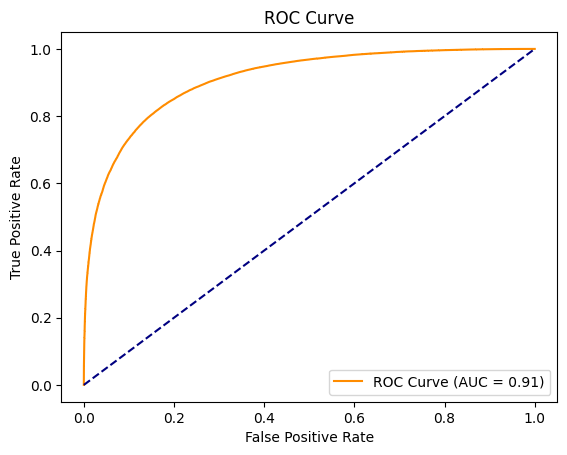

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Conv1D, MaxPooling1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk.tokenize import RegexpTokenizer

# Load the dataset
tweets_data = pd.read_csv('training.1600000.processed.noemoticon.csv',
                          encoding='latin-1',
                          names=['Sentiment', 'ID', 'Date', 'Query', 'User', 'Text'])

# Keep relevant columns
tweets_data = tweets_data[['Sentiment', 'Text']]

# Convert sentiment to binary (0 = Negative, 1 = Positive)
tweets_data['Sentiment'] = tweets_data['Sentiment'].replace({4: 1, 0: 0})

# Tokenization and cleaning
tokenizer = RegexpTokenizer(r'[a-zA-Z@]+')
tweets_data['Clean_Text'] = tweets_data['Text'].apply(lambda x: ' '.join(tokenizer.tokenize(x.lower())))

# Prepare data for modeling
max_len = 30
tokenizer = Tokenizer()
tokenizer.fit_on_texts(tweets_data['Clean_Text'])
X = tokenizer.texts_to_sequences(tweets_data['Clean_Text'])
X = pad_sequences(X, maxlen=max_len)
y = tweets_data['Sentiment']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Build the model
model = Sequential([
    Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=max_len),
    Conv1D(filters=64, kernel_size=5, activation='relu', padding='same'),
    MaxPooling1D(pool_size=2),
    Dropout(0.5),
    LSTM(100),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with a reduced batch size
batch_size = 256
epochs = 1
model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_test, y_test), verbose=1)

# Evaluate the model
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

# Metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_binary))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_binary))

# ROC Curve
roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, _ = roc_curve(y_test, y_pred)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

# Load the dataset
dataset_path = 'training.1600000.processed.noemoticon.csv'
data = pd.read_csv(dataset_path, encoding="ISO-8859-1", header=None, usecols=[0, 5])
data.columns = ['sentiment', 'text']

# Map sentiment values
sentiment_map = {0: 0, 4: 2}  # Map Negative (0), Positive (4), and add Neutral (1)
data['sentiment'] = data['sentiment'].map(sentiment_map)

# Add a neutral sentiment where missing
data['sentiment'] = data['sentiment'].fillna(1)

# Subset the data for quicker training
data = data.sample(10000, random_state=42)  # Use only 10,000 samples for speed

# Tokenize and pad sequences
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(data['text'])
sequences = tokenizer.texts_to_sequences(data['text'])
max_sequence_length = 100
data_padded = pad_sequences(sequences, maxlen=max_sequence_length)

# Convert sentiment to categorical
labels = to_categorical(data['sentiment'], num_classes=3)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(data_padded, labels, test_size=0.2, random_state=42)

# Build the model
model = Sequential([
    Embedding(input_dim=10000, output_dim=128),
    LSTM(units=64, return_sequences=False),
    Dropout(0.5),
    Dense(units=3, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=1, batch_size=32)  # Reduced epochs and batch size for speed

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Loss: {loss}, Accuracy: {accuracy}")


250/250 ━━━━━━━━━━━━━━━━━━━━ 23s 84ms/step - accuracy: 0.5490 - loss: 0.7654
63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.7103 - loss: 0.5698
Loss: 0.5494266748428345, Accuracy: 0.7204999923706055


In [ ]:
# Count occurrences of each sentiment class
sentiment_counts = data['sentiment'].value_counts()

# Print the counts
print("Sentiment Distribution:")
print(f"Negative (0): {sentiment_counts.get(0, 0)}")
print(f"Neutral (1): {sentiment_counts.get(1, 0)}")
print(f"Positive (2): {sentiment_counts.get(2, 0)}")


Sentiment Distribution:
Negative (0): 5004
Neutral (1): 0
Positive (2): 4996


Unique Classes in Dataset: [0, 2]
Classification Report:
              precision    recall  f1-score   support

    Negative       0.76      0.62      0.69       980
    Positive       0.69      0.82      0.75      1020

    accuracy                           0.72      2000
   macro avg       0.73      0.72      0.72      2000
weighted avg       0.73      0.72      0.72      2000



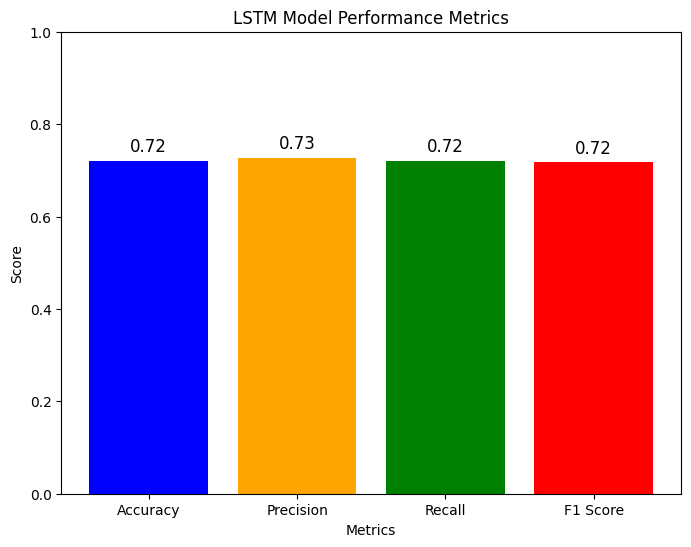

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

# Check the unique classes
unique_classes = sorted(set(y_test_classes) | set(y_pred_classes))
print("Unique Classes in Dataset:", unique_classes)

# Dynamically generate class names
class_names = {0: "Negative", 1: "Neutral", 2: "Positive"}
target_names = [class_names[cls] for cls in unique_classes]

# Compute metrics
accuracy = accuracy_score(y_test_classes, y_pred_classes)
precision = precision_score(y_test_classes, y_pred_classes, average='weighted')
recall = recall_score(y_test_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_test_classes, y_pred_classes, average='weighted')

# Print the classification report
print("Classification Report:")
print(classification_report(y_test_classes, y_pred_classes, target_names=target_names))

# Prepare data for graph
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
scores = [accuracy, precision, recall, f1]

# Plot the metrics
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.bar(metrics, scores, color=['blue', 'orange', 'green', 'red'])
plt.ylim(0, 1)
plt.title("LSTM Model Performance Metrics")
plt.ylabel("Score")
plt.xlabel("Metrics")
for i, v in enumerate(scores):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontsize=12)
plt.show()
